<a href="https://www.kaggle.com/code/bryanqtnguyen/derminsight-cnn?scriptVersionId=167918545" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **This is a rudimentary Convolutional Neural Network used to classify skin lesions to be either benign or malignant.**
# 
**Feel free to comment and use the code for your own purposes**

This model has been used for research for the UNLV College of Science, Science Fair. 

Link to the engineering notebook: https://docs.google.com/document/d/1O36dfkg_asUHnv_G6l_Ch3yvkHiB4Dq1dvB7kZ6VKDo/edit

This explains my thought process and each version iteration. 

This will also be the version published into GitHub.

# Code and its descriptions below: 

**This imports the necessary libraries needed to make the model**

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

2024-03-20 05:48:55.178753: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-20 05:48:55.178871: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-20 05:48:55.340586: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**This explains the code below:**

The size of the image would become 64 by 64. Often times a bigger size is better as it captures more detail. However, the bigger the size requires more computer resources. 32 and 64 are good sizes. Considering my computer is rather strong, I decided to go with 64.

Batch Size is the amount of times the network would train on before updating its parameters. Often times, the lower the batch size, the more accurate the model. However, like before when it gets too low, this will directly impact the speed of the model.

The rest is code that sorts out the loaded data.

**Meaningful Changes:**

img_height, img_width = 32, 32 to img_height, img_width = 64, 64 (For performance)

batch_size = 32 to batch_size = 15 (For greater accuacy)

**References:**

IJ Apps. (2022, January 30). Custom TensorFlow model for image classification app | #1. Www.youtube.com. https://youtu.be/ba42uYJd8nc?si=ZaZLiuYo7C1O-xQp Usmani, I. A., Qadri, M. T., Zia, R., Alrayes, F. S., Saidani, O., & Dashtipour, K. (2023). Interactive effect of learning rate and batch size to implement transfer learning for brain tumor classification. Electronics, 12(4), 964. https://doi.org/10.3390/electronics12040964

The dataset and its citations are in this link:

https://www.kaggle.com/datasets/bryanqtnguyen/benign-and-malignant-skin-lesion-dataset

In [2]:
img_height, img_width = 64, 64
batch_size = 15

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/benign-and-malignant-skin-lesion-dataset/Benign_Malignant_DataSet/MainData/train",
    image_size = (img_height, img_width),
    batch_size = batch_size,
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/benign-and-malignant-skin-lesion-dataset/Benign_Malignant_DataSet/MainData/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size,
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/input/benign-and-malignant-skin-lesion-dataset/Benign_Malignant_DataSet/MainData/test",
    image_size = (img_height, img_width),
    batch_size = batch_size,
)

Found 3603 files belonging to 2 classes.
Found 426 files belonging to 2 classes.
Found 430 files belonging to 2 classes.


**This code just simply displays the data**

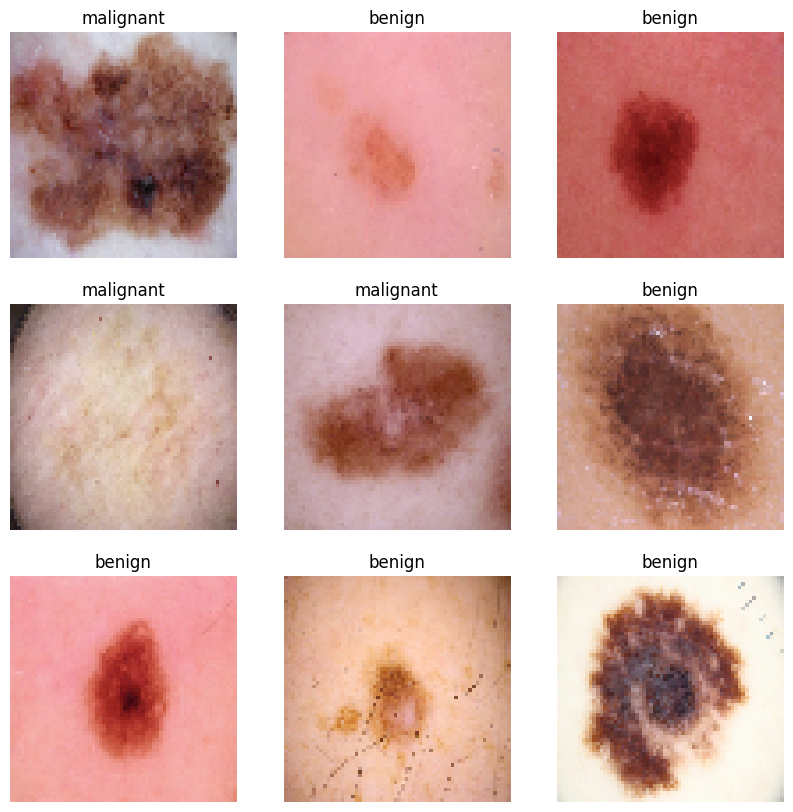

In [3]:
class_names = ["benign", "malignant"]
plt.figure(figsize = (10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

**This code basically allows me to see the amount of malignant and benign from the enter**

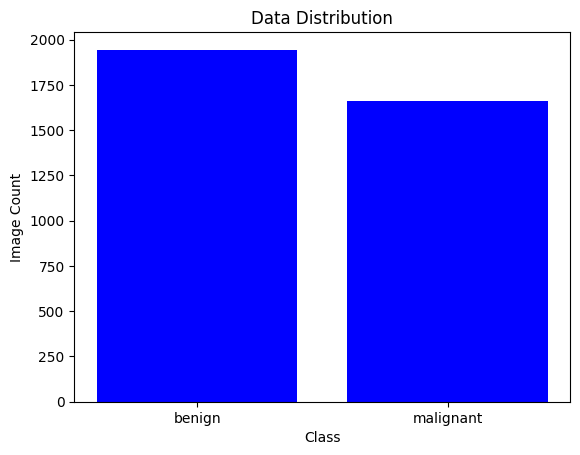

In [4]:
def count_class_occurrences(dataset):
    class_counts = {class_name: 0 for class_name in dataset.class_names}
    
    for _, labels in dataset:
        for label in labels.numpy():
            class_counts[dataset.class_names[label]] += 1
            
    return class_counts

train_class_counts = count_class_occurrences(train_ds)
validation_class_counts = count_class_occurrences(validation_ds)
test_class_counts = count_class_occurrences(test_ds)

plt.bar(train_class_counts.keys(), train_class_counts.values(), label='Train', color = 'blue')
plt.bar(validation_class_counts.keys(), validation_class_counts.values(), label='Validation', color = 'blue')
plt.bar(test_class_counts.keys(), test_class_counts.values(), label='Test', color = 'blue')
plt.title('Data Distribution')
plt.xlabel('Class')
plt.ylabel('Image Count')
plt.show()

**This code is more specific and displays the amount of images used in each dataset**

In addition, this is not shown but the amount of malignant and bengign in each dataset should be very similar with a slight difference of about 5-10 images.

80% in train and 20% in validation/test

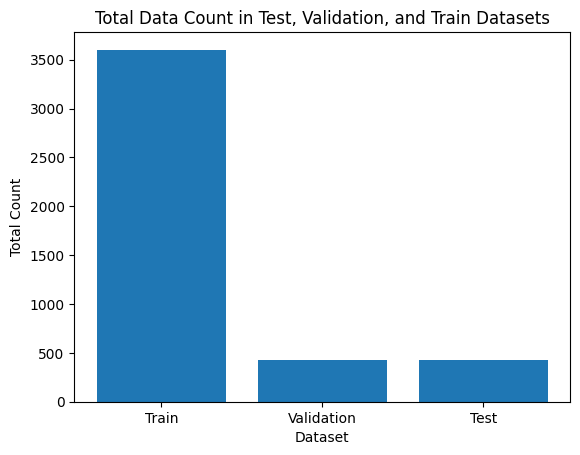

In [5]:
def count_class_occurrences(dataset):
    class_counts = {class_name: 0 for class_name in dataset.class_names}
    
    for _, labels in dataset:
        for label in labels.numpy():
            class_counts[dataset.class_names[label]] += 1
            
    return class_counts

train_class_counts = count_class_occurrences(train_ds)
validation_class_counts = count_class_occurrences(validation_ds)
test_class_counts = count_class_occurrences(test_ds)

plt.bar(['Train', 'Validation', 'Test'], [sum(train_class_counts.values()), sum(validation_class_counts.values()), sum(test_class_counts.values())])
plt.title('Total Data Count in Test, Validation, and Train Datasets')
plt.xlabel('Dataset')
plt.ylabel('Total Count')
plt.show()

**This is the Convolutional Nueral Network (CNN)**

*Rescaling layer* - This layer is only used to make the inputs deal with lesser numbers. 255 stands for the amount of color values. From 0 to 255 to 0 to 1

*Convo2D layer* - In simple terms, this is a layer scans the image and detects certain patterns or features.

*Batch Normalization layer* - It is a layer which normalizes the output based on the mean and standard deviation. This makes things run faster while avoiding overfitting.

*Max Pooling 2D layer* - This layer redues the resolution of an image and takes the most important feature from each pixel. This makes the model run on images of a lower resoltution to reduce computational complexity.

*Dropout* - This layer takes out some neurons and nodes randomly throughout the training to prevent overfitting, making sure that the model is actually learning properly. 

*Dense layer* - This layer takes the input from the previous layers in order to make a final prediction. 

*Flatten layer* - This layer converts the two dimensial arrays from the max pooling layers to be prepped for the dense layers. 

**Meaningful Changes**

Added in BatchNormalization, Flatten, and MaxPooling2D.

Changed the filter amount from 16, 32, 64 to 32, 64, 128

Added an additional Dropout to the final max pooling layer.

Changed the Dropout units from 0.5 to 0.2 and 0.4.

Changed the final activation to Sigmoid. 

**References:**

IJ Apps. (2022, January 30). Custom TensorFlow model for image classification app | #1. Www.youtube.com. https://youtu.be/ba42uYJd8nc?si=ZaZLiuYo7C1O-xQp

Martín Abadi, Ashish Agarwal, Paul Barham, Eugene Brevdo, Zhifeng Chen, Craig Citro, … Xiaoqiang Zheng. (2015). TensorFlow: Large-Scale Machine Learning on Heterogeneous Systems. Retrieved from https://www.tensorflow.org/

In [6]:
model = tf.keras.Sequential([

      tf.keras.layers.Rescaling(1./255),
    
      tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation="relu"),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPooling2D(),
    
      tf.keras.layers.Conv2D(64, kernel_size = (3,3), activation="relu"),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPooling2D(),
    
      tf.keras.layers.Conv2D(128, kernel_size = (3,3), activation="relu"),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Dropout(0.2),
      

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='sigmoid'),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(3),
])

**This compiles the model and prepares it for training.**

*Optimizer* - While training there is a loss. Loss basically shows how well a network is performing a task. The higher the worse. The optimizer seeks to lower this number.

In this case Adam has been replaced with Adagrad. 

In [7]:
from tensorflow.keras.optimizers import Adagrad
model.compile(
    optimizer= "Adagrad",
    loss = tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

**Starting the training. While it trains from the train dataset, it basically tests its knowledge with a validation dataset which is different from the train**

The training will repeat 10 times. When creating the final model after all the code is at a good standard, the training will repeat up to 20 times.

Epoch 1/20


2024-03-20 05:50:57.567479: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1710913861.061623      79 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


241/241 [==============================] - 43s 155ms/step - loss: 0.6021 - accuracy: 0.7283 - val_loss: 0.9658 - val_accuracy: 0.5352
Epoch 2/20
241/241 [==============================] - 38s 154ms/step - loss: 0.5103 - accuracy: 0.7596 - val_loss: 0.5938 - val_accuracy: 0.6737
Epoch 3/20
241/241 [==============================] - 38s 155ms/step - loss: 0.4799 - accuracy: 0.7719 - val_loss: 0.4900 - val_accuracy: 0.7653
Epoch 4/20
241/241 [==============================] - 37s 152ms/step - loss: 0.4537 - accuracy: 0.7896 - val_loss: 0.4898 - val_accuracy: 0.7770
Epoch 5/20
241/241 [==============================] - 38s 154ms/step - loss: 0.4377 - accuracy: 0.7968 - val_loss: 0.4885 - val_accuracy: 0.7793
Epoch 6/20
241/241 [==============================] - 38s 154ms/step - loss: 0.4213 - accuracy: 0.8046 - val_loss: 0.4908 - val_accuracy: 0.7723
Epoch 7/20
241/241 [==============================] - 38s 153ms/step - loss: 0.4058 - accuracy: 0.8110 - val_loss: 0.4754 - val_accuracy: 0.7

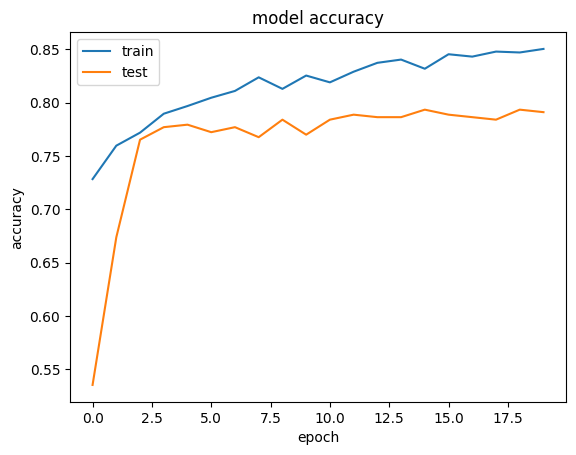

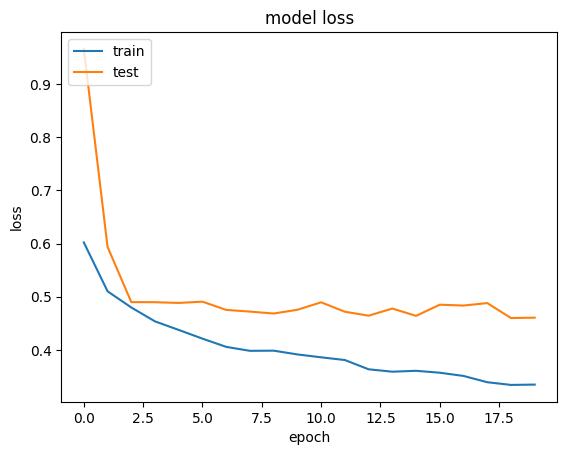

In [8]:
history = model.fit(
    train_ds,
    validation_data = validation_ds,
    epochs = 20
)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Final test with a completely new dataset**

In [9]:
model.evaluate(test_ds)

29/29 [==============================] - 13s 306ms/step - loss: 0.3067 - accuracy: 0.8651


[0.3066645860671997, 0.8651162981987]

**A visualization of the model. This shows its prediciton and the actual diagnosis of the skin lesion**

In [10]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  print(classifications)

tf.Tensor(
[[ 3.2170832e+00  3.3422124e-01 -3.4797285e+00]
 [ 2.0249853e+00  1.4913462e+00 -4.1712422e+00]
 [ 1.1798654e+00  2.0380495e+00 -3.8420954e+00]
 [ 8.1029743e-01  1.5448529e+00 -3.5384159e+00]
 [ 2.7606845e+00  4.2803299e-01 -3.0291495e+00]
 [ 6.0775316e-01  3.5067184e+00 -4.0448623e+00]
 [ 2.3794924e-01  3.1392553e+00 -3.9901545e+00]
 [ 5.3645307e-01  2.8162844e+00 -4.5499697e+00]
 [ 9.3554342e-01  2.6182327e+00 -3.6652274e+00]
 [ 4.7117257e+00 -2.0192733e+00 -3.2166779e+00]
 [ 3.6457675e-03  3.8766160e+00 -4.0127411e+00]
 [-8.7049760e-02  4.3561969e+00 -4.1274295e+00]
 [ 2.0909078e+00  7.0764178e-01 -3.7804060e+00]
 [ 3.7911215e+00  2.4793944e-01 -3.9007576e+00]
 [ 1.1929394e+00  2.3420238e+00 -3.6681900e+00]], shape=(15, 3), dtype=float32)


<Figure size 1000x1000 with 0 Axes>

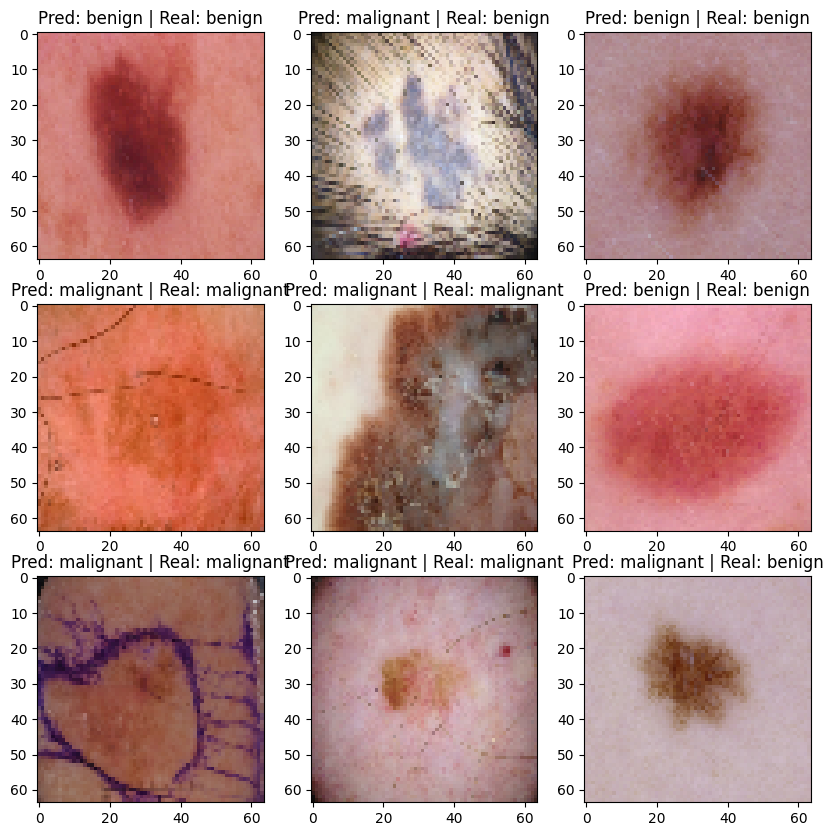

In [11]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)

  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

**This is a converter to make the model into a file. This file will be used in my android app.**

In [12]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("modelFinal1.tflite", 'wb') as f:
  f.write(tflite_model)

Summary on the non-converted ops:
---------------------------------
 * Accepted dialects: tfl, builtin, func
 * Non-Converted Ops: 17, Total Ops 36, % non-converted = 47.22 %
 * 17 ARITH ops

- arith.constant:   17 occurrences  (f32: 16, i32: 1)



  (f32: 3)
  (f32: 3)
  (f32: 2)
  (f32: 1)
  (f32: 3)
  (f32: 3)
  (f32: 1)
